In [2]:
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pymks
import pandas as pd
import os
from Scripts import velocityCalculations as vel
from Scripts import hoshenKopleman as hosh
import math
import time
from numpy import linalg as LA

--- 4.238354444503784 seconds ---


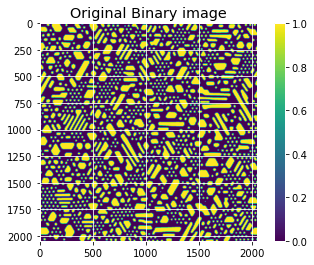

In [43]:
path = '/home/sushil/Desktop/adithya/HEXAGONAL/C04/'
list_of_files = os.listdir(path)
list_of_files.sort()
list_files = []
for i in list_of_files:
    if i[-5:]=='0.dat':
        list_files.append(path+i)
start_time = time.time()
img_ = corr.dat_to_numpy(list_files[10])
img_ = vel.gaussian_filter(img_,4)
img_ = (img_>0.5)*1
print("--- %s seconds ---" % (time.time() - start_time))
plt.imshow(img_)
plt.colorbar()
plt.title('Original Binary image')
plt.show()

In [71]:
def monteCarloConvexity(img):
    counter = 1
    counterPositive12 = 0
    counterPositive14 = 0
    counterPositive34 = 0
    A12=[]
    A14=[]
    A34=[]
    A=[]
    for i in range(50000):
        x1 = np.random.randint(0,2048)
        y1 = np.random.randint(0,2048)
        x2 = np.random.randint(0,2048)
        y2 = np.random.randint(0,2048)
        
        x12 = int((x1+x2)/2)
        y12 = int((y1+y2)/2)
        x14 = int((x1+3*x2)/4)
        x34 = int((3*x1+x2)/4)
        y14 = int((y1+3*y2)/4)
        y34 = int((3*y1+y2)/4)
    
        if(img_[x1][y1]==1 and img_[x2][y2]==1):
            counter=counter+1
            if img_[x12][y12]==1:
                counterPositive12=counterPositive12+1
            if img_[x14][y14]==1:
                counterPositive14=counterPositive14+1
            if img_[x34][y34]==1:
                counterPositive34=counterPositive34+1
        
        A12.append(counterPositive12/counter)
        A14.append(counterPositive14/counter)
        A34.append(counterPositive34/counter)
        A.append((counterPositive12+counterPositive14+counterPositive34)/3/counter)
        
    return (counterPositive12+counterPositive14+counterPositive34)/3/counter
            
    
    

In [72]:
B=[]
j = 0
for i in list_files:
    j = j+1
    if j%10==0:
        img_ = corr.dat_to_numpy(i)
        img_ = vel.gaussian_filter(img_,4)
        img_ = (img_>0.5)*1
        mont = monteCarloConvexity(img_)
        B.append(mont)
        print(mont)


0.3672944324379953
0.37515037774890525
0.38245040628262744
0.3913771083806756
0.3912440398786302
0.387504942665085
0.3851929917006982
0.3909157320269864
0.3924307082201819
0.3911070780399274
0.39028784882443424
0.39239316239316235
0.38922155688622756
0.39080161101727945
0.3940338572108932
0.39542314335060447
0.3886532116381712
0.3902033508121243
0.3932204838847568
0.39839294971487815
0.3968398663020359
0.4039351851851852
0.39618479107189203
0.3902386490910657
0.39127408760711646
0.39108932180793876
0.3882433065168348
0.39639287266405915
0.39520185734554364
0.3928586755933222
0.39647275373485724
0.39638236185036135
0.40096618357487923
0.3953035806953814
0.3999315625133667
0.3937854542375751
0.39193035325632014
0.3983656792645557
0.39428619871142756
0.3938428874734607
0.3980565900432344
0.3913025013802183
0.39857470094171543
0.3932926829268293
0.39430997876857754
0.3945016308721989
0.3986022871664549
0.39829646580218664
0.39948914431673055
0.3972743635896117
0.39268166537367466
0.3982323

KeyboardInterrupt: 

In [69]:
monteCarloConvexity(img_)

0.0

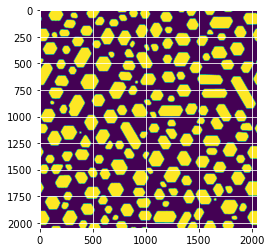

In [70]:
plt.imshow(img_)

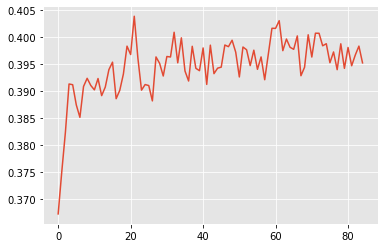

In [73]:
plt.plot(B)